# Interface Demonstration Notebook

A notebook to demonstrate an interface with some of the features of the Probability of Failure Model

Author: gavin.treseder@essentialenergy.com.au

In [8]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import copy

import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

from pof.component import Component
from pof.failure_mode import FailureMode
from pof.interface.layouts import *
from pof.interface.config import Config as cf
from pof.interface.figures import update_condition_fig, update_cost_fig, update_pof_fig

In [9]:
comp = Component().set_demo()
fm = FailureMode().set_demo()

In [10]:
# Component layout
mcl = make_component_layout(comp)
mfml = make_failure_mode_layout(fm)

var_to_scale = cf.scaling

In [11]:
def validate_layout(pof_obj, layout):

    objs = pof_obj.get_objects()
    collapse = [id + '-collapse' for id in objs if id + '-collapse' not in layout]
    collapse_button = [id + '-collapse-button'for id in objs if id + '-collapse-button' not in layout]

    params = pof_obj.get_dash_ids()

    layout_objects = collapse + collapse_button + params

    return [obj for obj in layout_objects if obj not in layout]


validate_layout(comp, mcl)

[]

In [12]:
graph_limit =  dbc.InputGroup(
    [
        dbc.InputGroupAddon(
            [
                dbc.Checkbox(id='graph_y_limit_active', checked=True),
                
            ],
            addon_type="prepend"
        ),
        dbc.Label("Graph Y Limit"),
        dbc.Input(
            type="number",
            id= 'graph_y_limit',
            #value = ,
            debounce=True,
        ),
    ],
)

graph_inputs = [Input('graph_y_limit_active', 'checked'), Input('graph_y_limit', 'value')]

In [13]:

# Build App
external_stylesheets = [dbc.themes.BOOTSTRAP]
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Layout
app.layout = html.Div([
    html.Div(children='Test Output', id='test_output'),
    graph_limit,
    dbc.Row(
        [
            dbc.Col(dcc.Graph(id='pof-fig')),
            dbc.Col(dcc.Graph(id='cond-fig')),
            dbc.Col(dcc.Graph(id="cost-fig"))
        ]
    ),
    mcl,
])

collapse_ids = comp.get_objects()

@app.callback(
    [Output(f"{prefix}-collapse", "is_open") for prefix in collapse_ids],
    [Input(f"{prefix}-collapse-button", "n_clicks") for prefix in collapse_ids],
    [State(f"{prefix}-collapse", "is_open") for prefix in collapse_ids],
)
def toggle_collapses(*args):
    ctx = dash.callback_context

    state_id = ""
    collapse_id = ctx.triggered[0]['prop_id'].split('.')[0].replace('-collapse-button','')
    if collapse_id in collapse_ids: #TODO change to is not None

        state_id = collapse_id + '-collapse.is_open'
        ctx.states[state_id] = not ctx.states[state_id]

    is_open = tuple(ctx.states.values())

    return is_open

ms_fig_update = comp.get_dash_ids()

@app.callback(
    [Output("cost-fig", "figure"),
    Output("pof-fig", "figure"),
    Output("cond-fig", "figure")], 
    graph_inputs + [Input(dash_id,"checked") if 'active' in dash_id else Input(dash_id,"value") for dash_id in ms_fig_update]
)
def update_maintenance_strategy(graph_y_limit_active, graph_y_limit, *args):

    # Check the parameters that changed
    ctx = dash.callback_context

    # If any parameters have changed update the objecte
    if ctx.triggered:
        dash_id = ctx.triggered[0]['prop_id'].split('.')[0]
        value = ctx.triggered[0]['value']

        # Scale the value if req
        value = value / var_to_scale.get(dash_id.split('-')[-1], 1)

        # update the model
        comp.update(dash_id, value)

    # Simulate an outcome
    local = copy.deepcopy(comp)
    local.mc_timeline(t_end=200, n_iterations=100)



    #if graph_y_limit_active:
    #    fig.update_yaxes(range=[0, graph_y_limit])

    cost_fig = update_cost_fig(local)
    pof_fig = update_pof_fig(local)
    cond_fig = update_condition_fig(local)

    return cost_fig, pof_fig, cond_fig


"""@app.callback(
    Output("test_output", "children"),
    [Input('comp-active', 'checked')]
)
def test(task_value):
    # Check the parameters that changed
    ctx = dash.callback_context
    dash_id = ctx.triggered[0]['prop_id'].split('.')[0]
    value = ctx.triggered[0]['value']

    return "value" + str(value)"""

#Execute
app.run_server(mode='inline', debug=True)

ading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degr

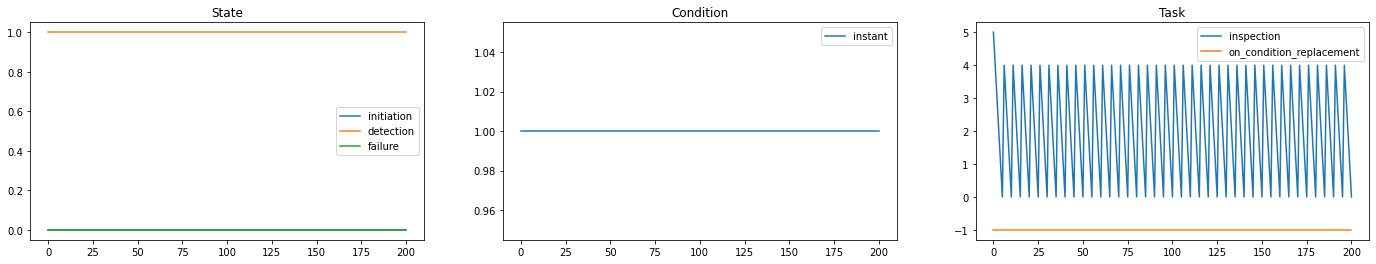

In [14]:
comp.mc_timeline(200)
comp.fm['random'].plot_timeline()

In [18]:
comp.__dict__

{'active': True,
 'age': 0,
 'age_last_insp': 0,
 '_parent_id': NotImplemented,
 '_children_id': NotImplemented,
 'name': 'comp',
 'indicator': {'safety_factor': <pof.indicator.PoleSafetyFactor at 0x16390e48bb0>,
  'slow_degrading': <pof.condition.Condition at 0x16390e48d60>,
  'fast_degrading': <pof.condition.Condition at 0x16390e48eb0>},
 'fm': {'early_life': <pof.failure_mode.FailureMode at 0x163fe81eca0>,
  'random': <pof.failure_mode.FailureMode at 0x163fe8cb790>,
  'slow_aging': <pof.failure_mode.FailureMode at 0x163fe8cbf10>,
  'fast_aging': <pof.failure_mode.FailureMode at 0x163fe8cbeb0>},
 '_sim_counter': 200}

In [12]:
comp.fm['random'].tasks['on_condition_replacement'].sim_failure_detection()

AttributeError: 'ConditionTask' object has no attribute 'sim_failure_detection'

In [8]:
stdev = 1
expected = dict()

for fm in comp.fm.values():
    # Get the expected condition loss for the failure mode

    if fm.active:
        for cond_name, condition in fm.conditions.items():

            ec = condition.perfect - np.array([fm._timelines[x][cond_name] for x in fm._timelines])

            if cond_name in expected:
                expected[cond_name] = expected[cond_name] + ec
            else:
                expected[cond_name] = ec

for cond_name, ecl in expected.items():
    mean = ecl.mean(axis=0)
    sd = ecl.std(axis=0)
    upper = mean + sd*stdev
    lower = mean - sd*stdev

    upper[upper > condition.perfect] = condition.perfect
    lower[lower < condition.failed] = condition.failed

    expected[cond_name] = dict(
        lower=lower,
        mean=mean,
        upper=upper,
    )

t found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
 46%|████▌     | 46/100 [00:06<00:05,  9.31it/s]
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not found
fast_degrading not

TypeError: 'numpy.float64' object does not support item assignment

In [21]:
fm._timelines

{}

In [8]:
update_condition_fig(comp)

In [11]:
from pof.helper import fill_blanks
t_end = 200
t_start = 0

erc = comp.expected_risk_cost()

if t_end == None:
    t_end = t_start
    for details in erc.values():
        for task in details.values():
            t_end = max(max(task['time'], default=t_start), t_end)

df = pd.DataFrame().from_dict(erc, orient='index')
df.index.name='failure_mode'
df = df.reset_index().melt(id_vars = 'failure_mode', var_name='task')
df = pd.concat([df.drop(columns=['value']),df['value'].apply(pd.Series)], axis=1)
df


,failure_mode,task,0,cost,time
0,early_life,inspection,NaN,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60..."
1,random,inspection,NaN,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60..."
2,slow_aging,inspection,NaN,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60..."
3,fast_aging,inspection,NaN,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60..."
4,early_life,on_condition_replacement,NaN,[],[]
5,random,on_condition_replacement,NaN,[],[]
6,slow_aging,on_condition_replacement,NaN,"[50.0, 50.0]","[162, 190]"
7,fast_aging,on_condition_replacement,NaN,[],[]
8,early_life,risk,NaN,"[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500...","[13, 15, 17, 38, 44, 52, 64, 72, 116, 130, 154..."
9,random,risk,NaN,"[500.0, 500.0, 1500.0, 500.0, 1500.0, 500.0, 1...","[11, 12, 14, 15, 17, 18, 20, 21, 22, 24, 25, 2..."


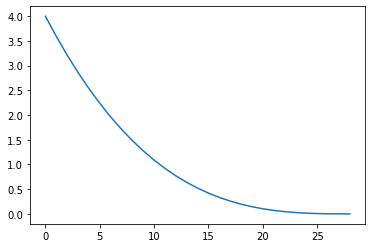

In [7]:
ind = comp.indicator['safety_factor']

sf = ind._safety_factor(
    agd = ind.component.indicator['external_diameter'].perfect,
    czd = ind.component.indicator['external_diameter'].get_condition_profile(200),
    wt = ind.component.indicator['wall_thickness'].get_condition_profile(200),
    margin = 4
)

plt.plot(sf)

In [11]:
df = comp.expected_risk_cost_df(t_end=200)

TypeError: replace expected at least 2 arguments, got 1

In [7]:
dash_id = 'FailureMode-fm-tasks-Task-inspection-active'
#value = False
#fm.update(dash_id, value)

comp.fm['fast_aging'].tasks['inspection'].t_interval=4

In [19]:
import numpy as np 
import math

task = comp.fm['slow_aging'].tasks['inspection']

t_stop = 100
t_delay=10

np.tile(
    np.linspace(5 - 1, 0, 5),
    math.ceil((t_stop - t_delay) / task.t_interval),
)

np.tile(
    np.arange(t_interval -1, 0, -1)
)

NameError: name 't_interval' is not defined

In [20]:
update_cost_fig(comp)

NameError: name 'update_cost_fig' is not defined

In [33]:
schedule = np.tile(
    np.linspace(self.t_interval - 1, 0, self.t_interval),
    math.ceil((t_stop - t_delay) / self.t_interval),
)

NameError: name 'np' is not defined

In [7]:
value = True
sep='-'
dash_id = 'FailureMode-fm-tasks-Task-inspection-active'
value = value / var_to_scale.get(dash_id.split(sep)[-1], 1)


# update the model
pof_obj.update(dash_id, value)
# Simulate an outcome
local = copy.deepcopy(pof_obj)
local.mc_timeline(t_end=200, n_iterations=100)
df = local.expected_risk_cost_df(t_end=200)

fig = px.area(
    df,
    x="time",
    y="cost_cumulative",
    color="task",
    #line_group='failure_mode',
    title="Maintenance Strategy Costs",
)

fig.show()

Invalid ID
100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


In [14]:
dash_id = 'FailureMode-fm-Distribution-untreated-beta'
value = 99
fm.update(dash_id, value)

fm.untreated.gamma

100

In [46]:
dash_id = 'failure_mode-fm'
sep='-'

obj = fm

# Remove the class type and class name from the dash_id
dash_id = dash_id.replace('failure_mode' + sep, '').replace(obj.name + sep, '')
var = dash_id.split(sep)[0]

# Check if the variable is an attribute of the class
if var in obj.__dict__:

    # Check if the variable is a dictionary
    if isinstance(obj.__dict__[var], dict): 
        key = dash_id.split(sep)[1]

        # Check if the variable is a class with its own dash methods
        if isinstance(obj.__dict__[var][key], (Component, Condition, Distribution, Consequence)):
                val = get_dash_id_value(obj.__dict__[var][key], dash_id)
        else:
            val = obj.__dict__[var][key]
    else:
        val = obj.__dict__[var]
else:
    val = ("Invalid id \"%s\" %s not in class" %(dash_id, var))



In [47]:
val

'Invalid id "conditions-wall_thickness" conditions not in class'

In [13]:
local = copy.deepcopy(fm)
local.mc_timeline(t_end=200, n_iterations=100)
df = local.expected_risk_cost_df()

fig = px.area(
    df,
    x="time",
    y="cost_cumulative",
    color="task",
    #line_group='failure_mode',
    title="Maintenance Strategy Costs",
)
fig.show()

100%|██████████| 100/100 [00:01<00:00, 58.39it/s]


In [8]:
df

,time,cost,cost_cumulative
task,,,
inspection,0,0,0
inspection,1,0,0
inspection,2,0,0
inspection,3,0,0
inspection,4,0,0
...,...,...,...
risk,196,0,0
risk,197,0,0
risk,198,0,0


In [9]:
# Testing to find the problem with the 
comp.expected_risk_cost_df(t_end=200).groupby(by=['failure_mode', 'task']).sum()

time  cost  cost_cumulative
failure_mode task                                             
fast_aging   cm                   20100     0                0
             inspection           20100     0                0
             on_condition_repair  20100     0                0
             risk                 20100     0                0
random       cm                   20100     0                0
             inspection           20100     0                0
             on_condition_repair  20100     0                0
             risk                 20100     0                0
slow_aging   cm                   20100     0                0
             inspection           20100     0                0
             on_condition_repair  20100     0                0
             risk                 20100     0                0

In [10]:
for fm in comp.fm.values():
    fm.cof.risk_cost_total = 10000

In [11]:
def update_maintenance_strategy():

    fm.mc_timeline(t_end=200, n_iterations=100)
    df = fm.expected_risk_cost_df()

    fig = px.area(
        df,
        x="time",
        y="cost_cumulative",
        color="task",
        #line_group='failure_mode',
        title="Maintenance Strategy Costs",
    )

    return fig

update_maintenance_strategy().show()

100%|██████████| 100/100 [00:01<00:00, 69.61it/s]


In [12]:
rc = fm.expected_risk_cost()



In [20]:
%%timeit
t_end = 0


40.5 µs ± 8.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
df = comp.expected_risk_cost_df(t_end=200)
df.set_index(['failure_mode', 'task']).loc[['slow_aging', 'inspection']].head(10)

time cost cost_cumulative
failure_mode task                                
slow_aging   inspection    0    0               0
             inspection    1    0               0
             inspection    2    0               0
             inspection    3    0               0
             inspection    4    0               0
             inspection    5    0               0
             inspection    6    0               0
             inspection    7    0               0
             inspection    8    0               0
             inspection    9    0               0

In [8]:
dash_id = 'task-inspection-active'
dash_id = dash_id.replace(next_id + sep, "")
task_name= dash_id.split(sep)[0]
dash_id = dash_id.replace(next_id + sep, "")
dash_id

'inspection-active'

In [13]:
task.active

False

In [12]:
fm.tasks['inspection'].__dict__['active'] = False